Экспоненциальное распределение. $X_{(i)}  \sim  exp(\lambda)$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

In [2]:
selection_size = 10 ** 4
number_of_tries = 20
theta = 1

Генерируем выборку из нашего распределения

In [3]:
selection = scipy.stats.expon.rvs(size = selection_size)
selection

array([ 0.09296556,  1.11922215,  0.74133621, ...,  0.89165209,
        0.09691784,  1.1471453 ])

Подготовим матрицу из нулей размера SelectionSize $\times$ NumberOfTries

In [4]:
evals = np.zeros((selection_size, number_of_tries))

Подсчитываем оценку нашего параметра $\theta^* = ({k!} / {\overline X^k})^({1}/{k})$

In [5]:
for k in range(1, number_of_tries + 1) :
    evals[:,k - 1] = [((i + 1) * float(math.factorial(k))\ 
                       / sum([x ** k for x in selection[selection_size - i - 1:]]))\
                      ** (1. / k) for i in xrange(selection_size)]

In [116]:
evals

array([[  3.12438426,   4.4185466 ,   5.67738299, ...,  23.59904881,
         24.77307675,  25.94601547],
       [  2.90255129,   4.09451998,   5.24796259, ...,  21.18595947,
         22.21091011,  23.23382293],
       [  1.49886905,   1.74912583,   1.97295419, ...,   6.11717192,
          6.40090003,   6.68461173],
       ..., 
       [  1.00486468,   1.00635997,   1.0091295 , ...,   1.40991995,
          1.44757652,   1.48574821],
       [  1.00493443,   1.00640793,   1.00916298, ...,   1.40992778,
          1.44758414,   1.48575564],
       [  1.00488942,   1.00640535,   1.00917938, ...,   1.40993562,
          1.44759176,   1.48576307]])

Следующие поля нужны, чтобы генерировать рандомный цвет (hex)

In [6]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']

In [7]:
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

Определим функцию $f(\theta^*, \theta) = |\theta^* - \theta|$

In [8]:
def f(x, y) :
    return abs(x - y)

In [9]:
color_generator()

'#1fc4de'

Cледующий лист нужен, чтобы подписать лэйблы

In [13]:
elems = ["k = " + str(i) for i in range(1, number_of_tries + 1)]

Данная функция строит k графиков с параметрами $[1...k]$ , на котором изображены модули разности нашей оценки и истинной

In [19]:
def draw_plot(k, ylimit = 1) :
    dots = [i for i in xrange(selection_size)]
    plt.figure(figsize=(15,5))
    for j in range(k):
        plot = plt.plot(dots, [f(evals[i, j], theta) for i in dots], color = color_generator(), label = elems[j])
        plt.ylim(0,ylimit)
        plt.xlabel('Number of elements')
        plt.ylabel('|$\\theta^* - \\theta$|')
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=10.5)
        plt.title('Exponential distribution $exp(\\lambda)$ where $\\lambda$ = ' + str(1))
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

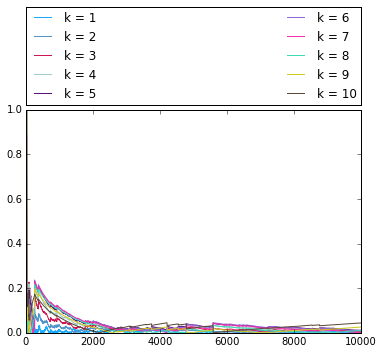

In [15]:
ylimit = 1
dots = [i for i in xrange(selection_size)]
for j in range(10):
    plot = plt.plot(dots, [f(evals[i, j], theta) for i in dots], color = color_generator(), label = elems[j])
    plt.ylim(0,ylimit)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()



# Перейдем непосредственно к построению графиков

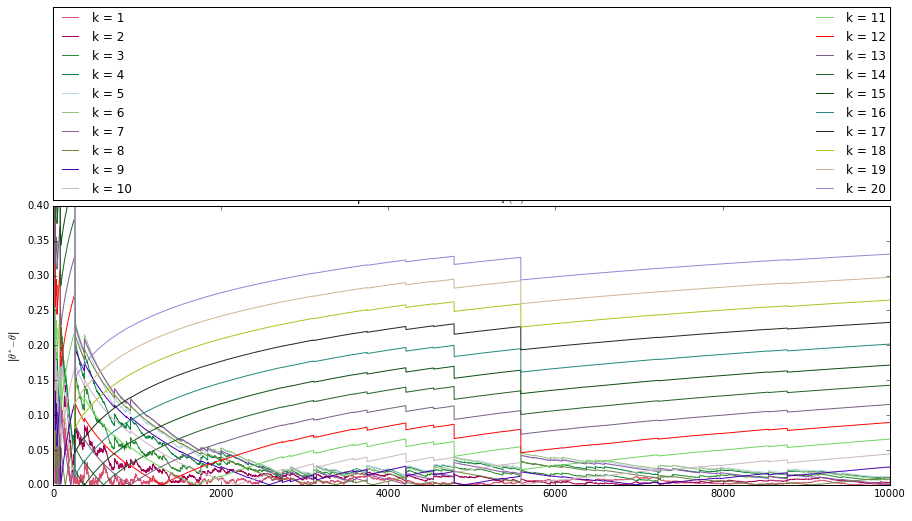

In [20]:
draw_plot(20, 0.4)

# Получаем Совсем Хаотичные графики

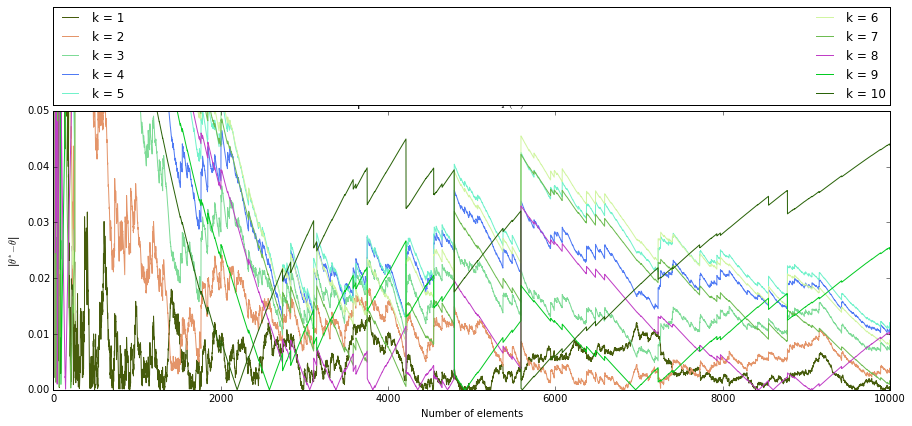

In [21]:
draw_plot(10, 0.05)

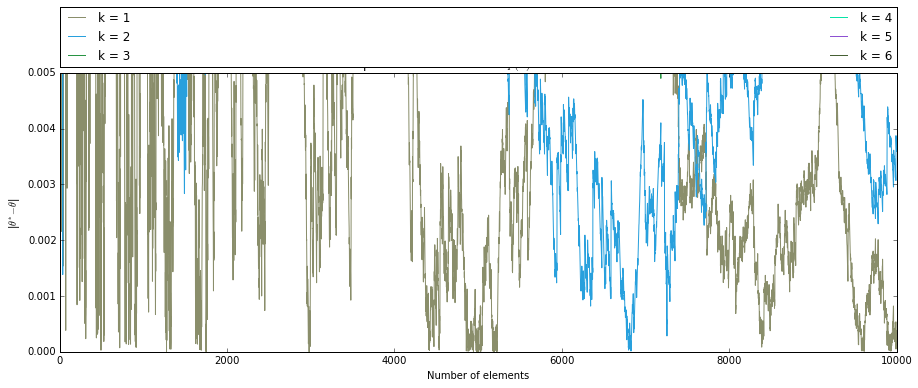

In [22]:
draw_plot(6, 0.005)

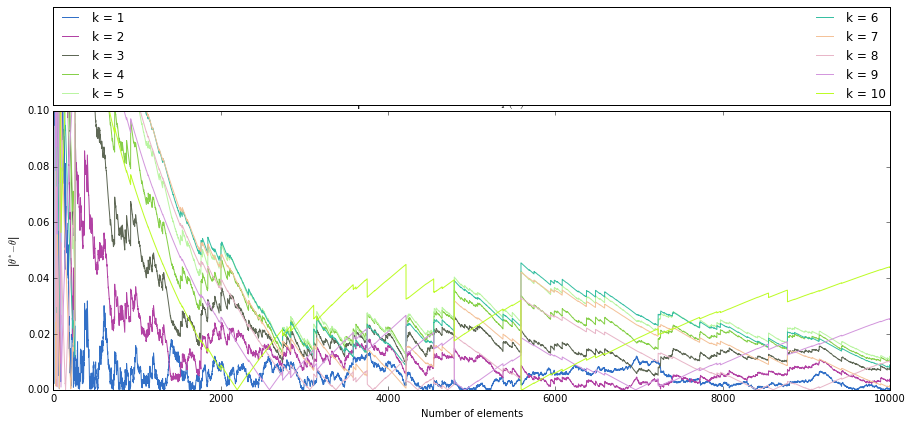

In [23]:
draw_plot(10, 0.1)

Данная функция строит один график, для фиксированного k = num

In [26]:
def draw_exact_eval(num, ylim = 1) :
    plt.figure(figsize=(15,5))
    plot = plt.plot(dots, [f(evals[i, num-1], theta) for i in dots], color = color_generator(), label = elems[num - 1])
    plt.ylim(0, ylim)
    plt.xlabel('Number of elements')
    plt.ylabel('|$\\theta^* - \\theta$|')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=1.5)
    plt.title('Uniform distribution $U[0, \\theta]$ where $\\theta$ = ' + str(theta))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

### Нарисуем несколько графиков по-отдельности

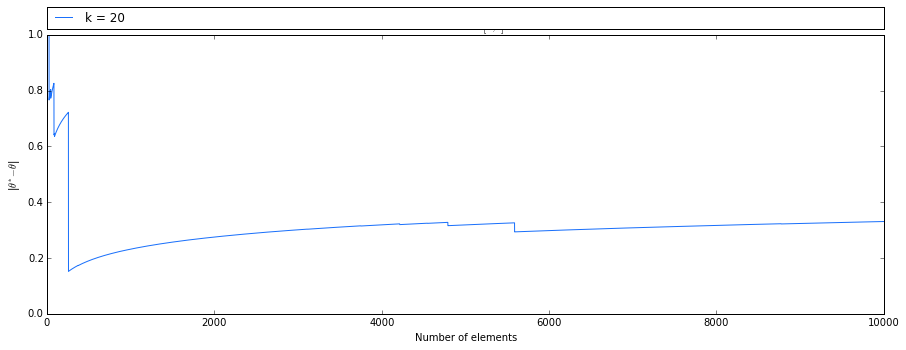

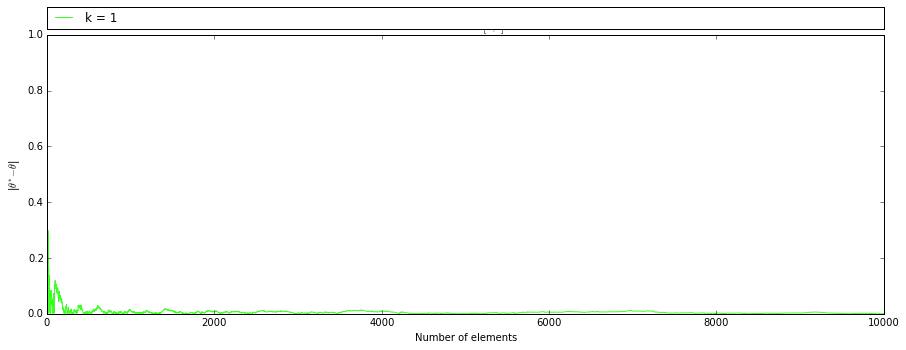

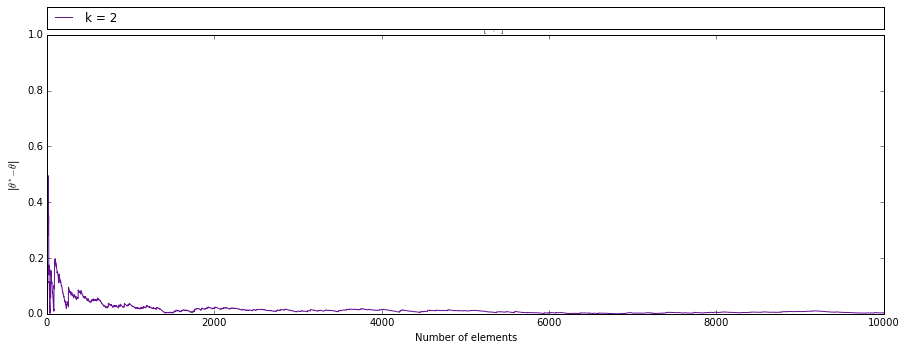

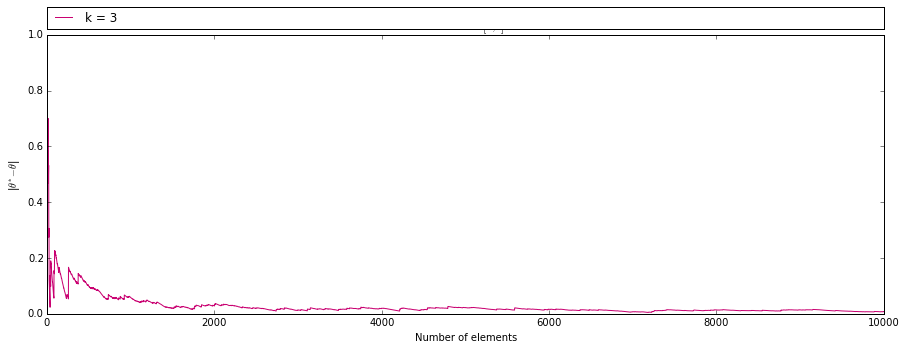

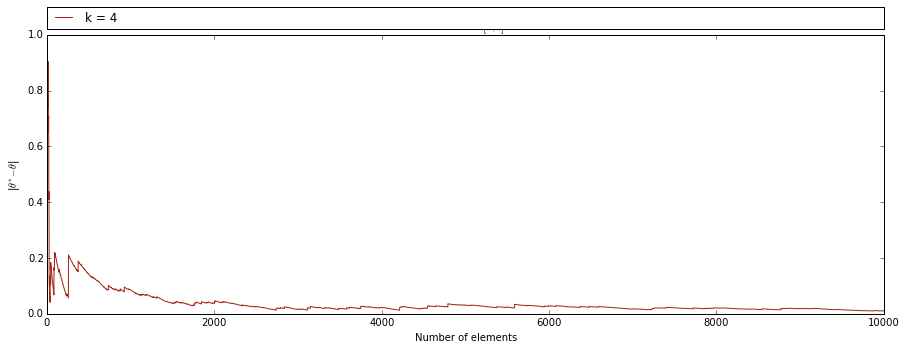

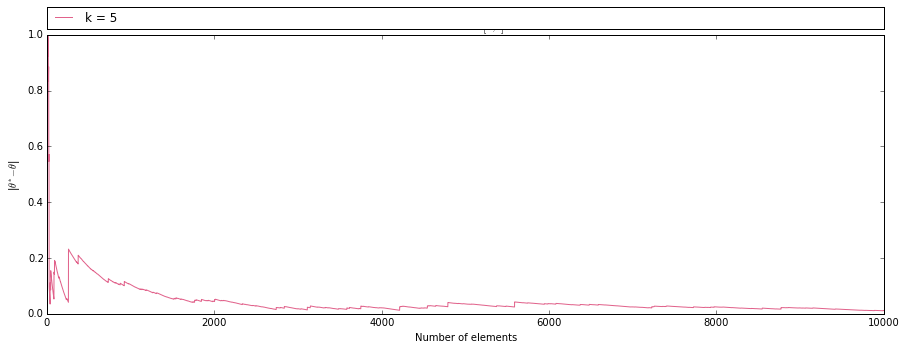

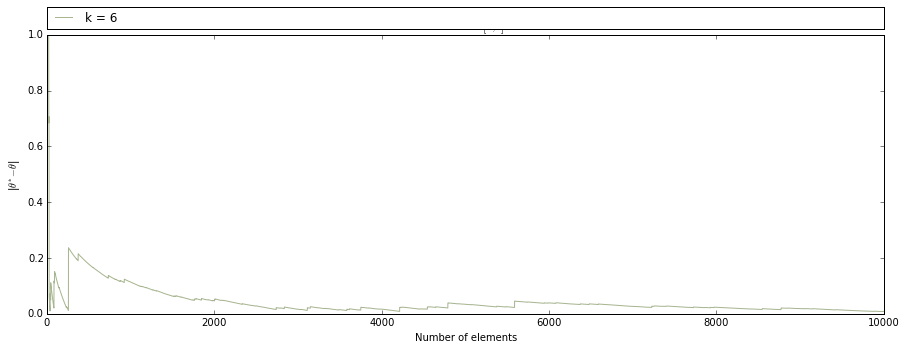

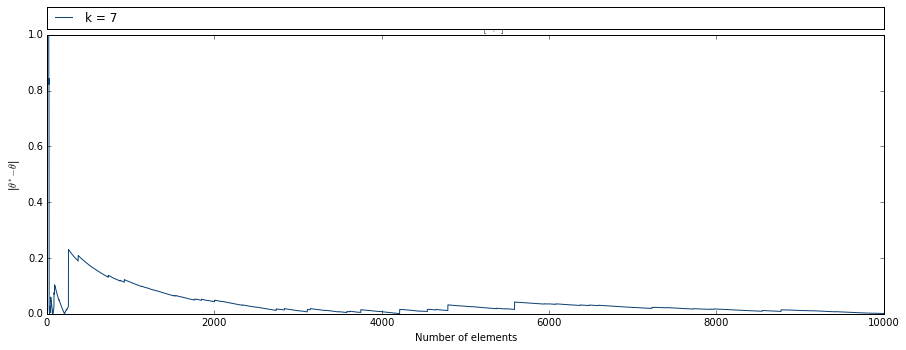

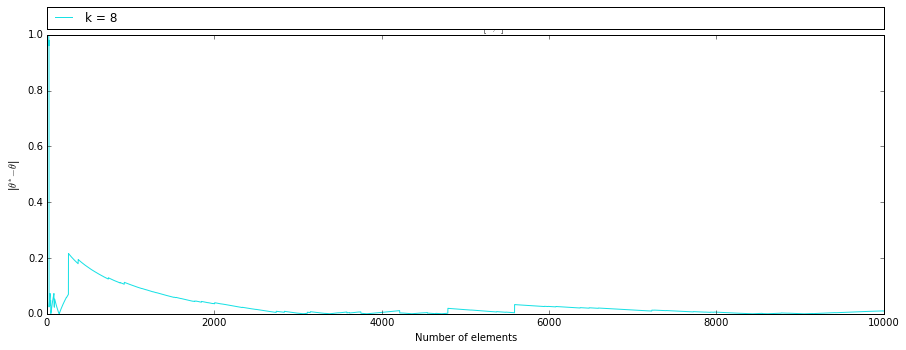

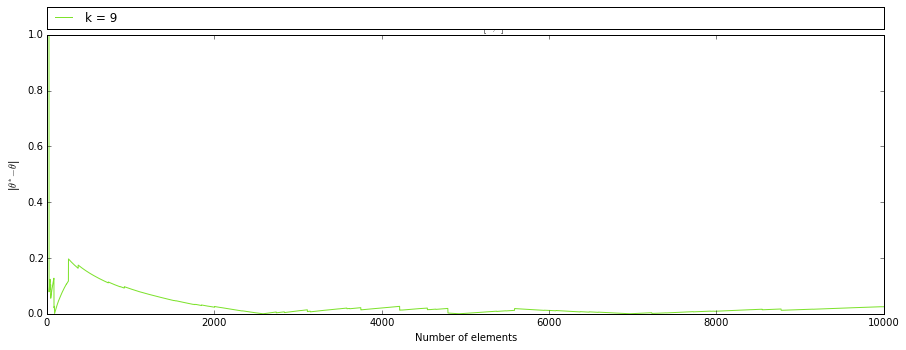

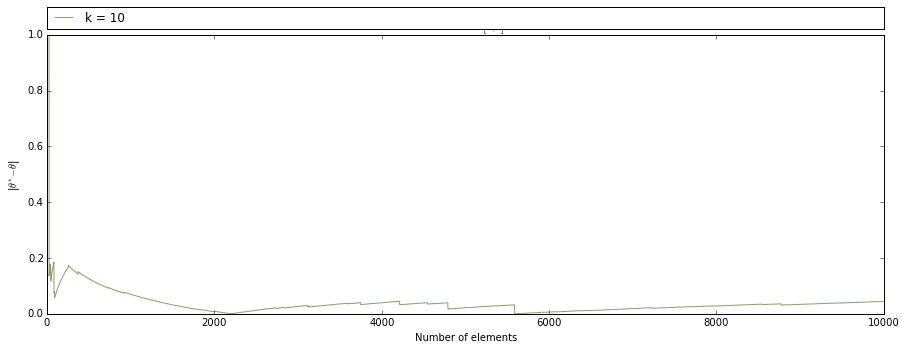

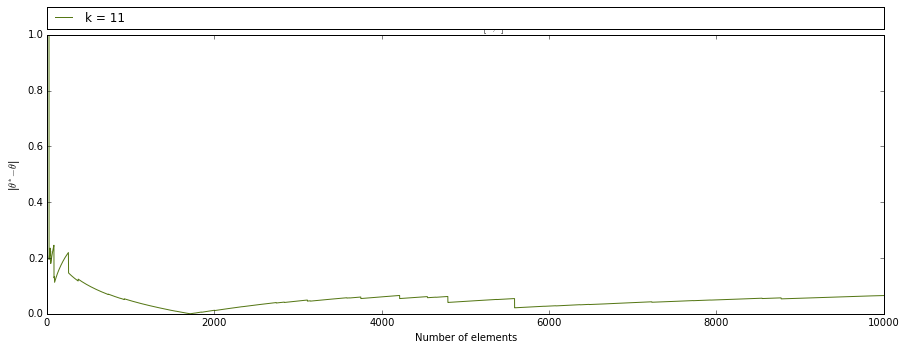

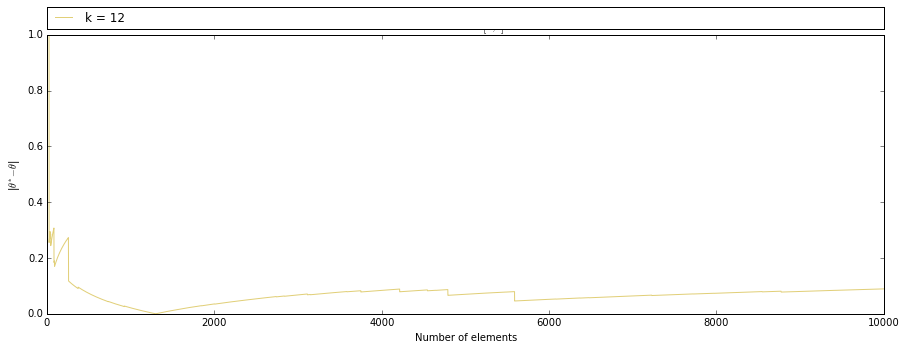

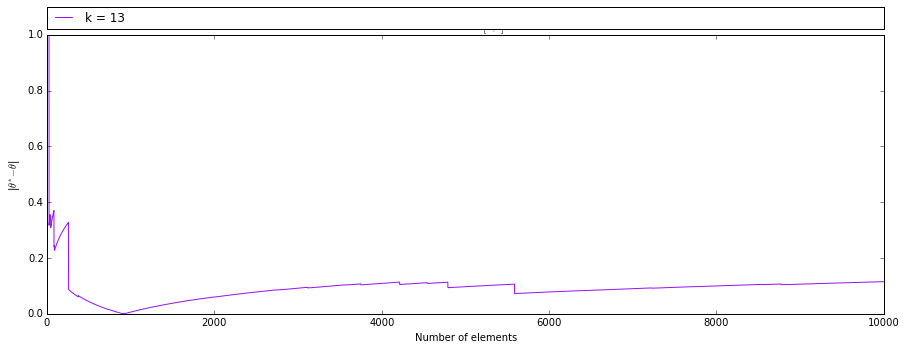

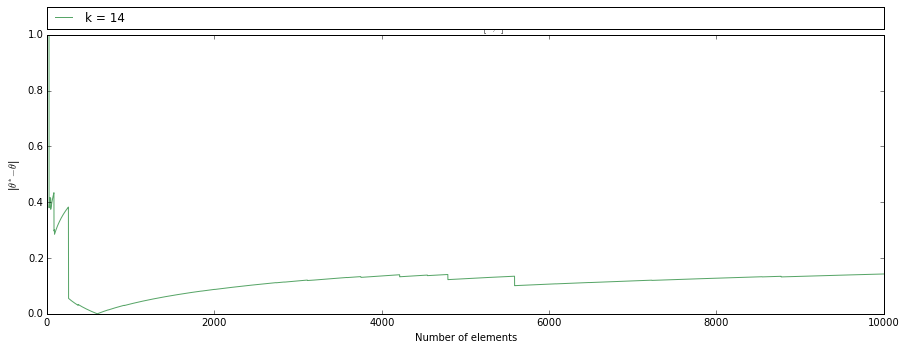

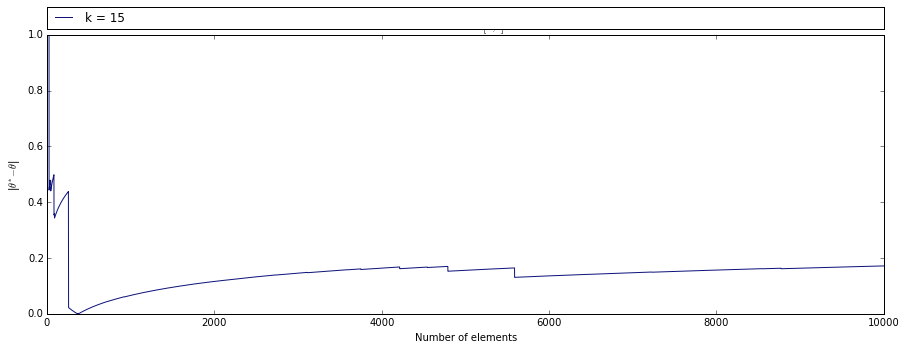

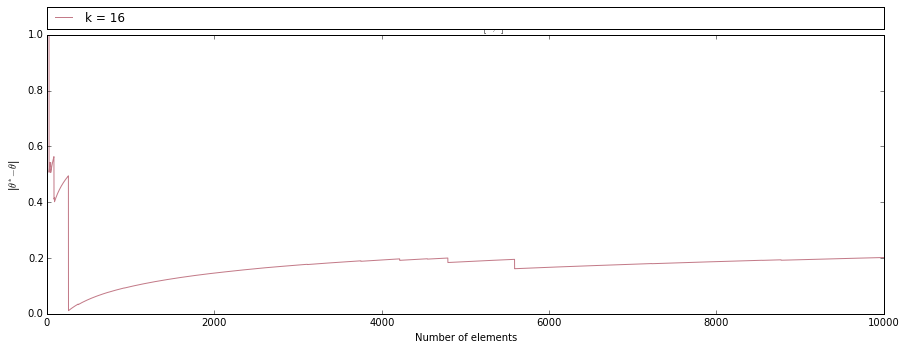

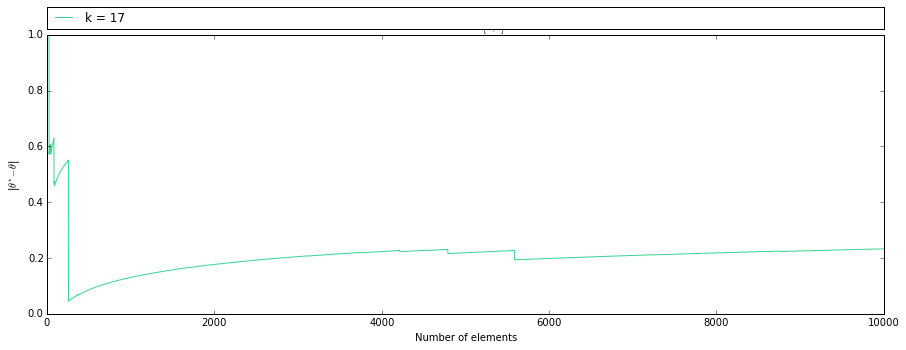

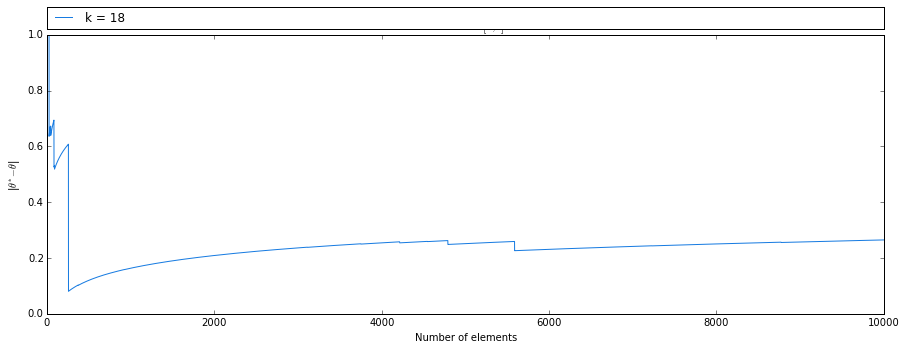

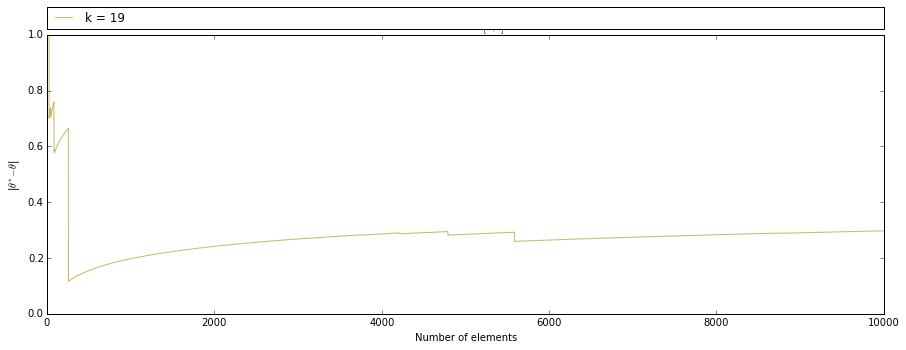

In [29]:
for j in range(20) :
    draw_exact_eval(j)

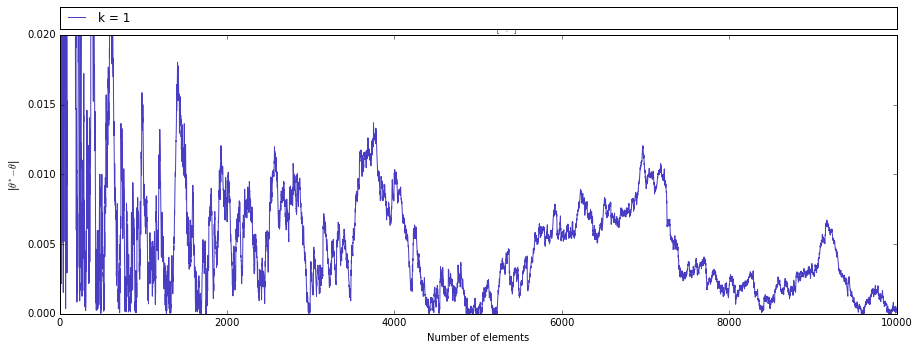

In [32]:
draw_exact_eval(1, 0.02)

# Вывод.
# Заметим, что при росте k в точке 10000 модуль разности принимает все большие и большие значения
## При k = 1, модуль разности нашей оценки с настоящей выглядит получше, чем при остальных значениях параметра k, рассмотренными мной [1...20]